# Prediction Model for Profit of 50_startups 

In [86]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 5 - Multilinear Regression\\50_Startups.csv")
df.rename(columns = {'R&D Spend':'RDSpend','Marketing Spend':'MarketingSpend'}, inplace = True)

In [30]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

#### Correlation Matrix

In [12]:
df.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


###### RDSpend-Profit, MarketingSpend-Profit, RDSpend-MarketingSpend, RDSpend-MarketingSpend are correlated in decreasing order. Administration-MarketingSpend have least correlation.

More RDSpend, more profit seems logical. More RDSpend gives better product which translates to higher profits.
Administration and MarketingSpend don't seem related as they are different independent departments.

#### Scatterplot between variables along with histograms

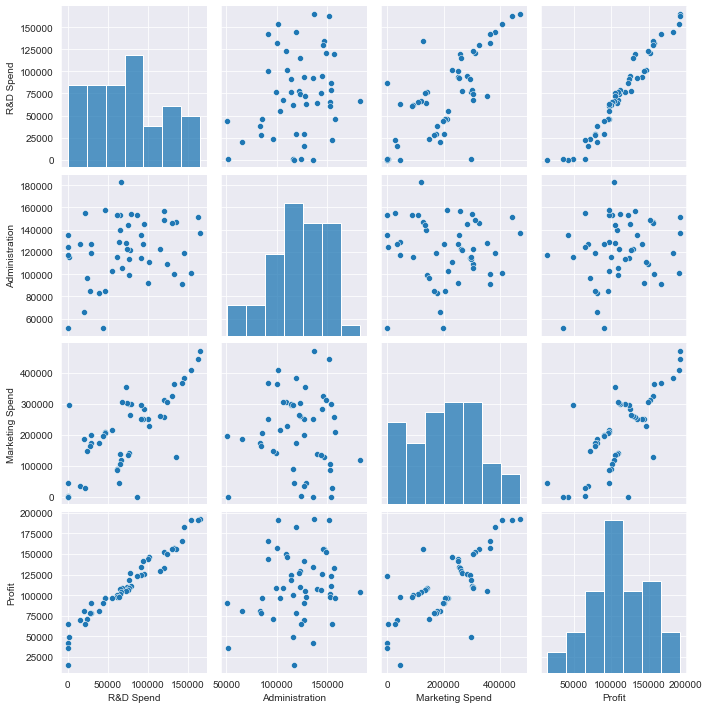

In [32]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [19]:
#Models based on Multilinear Regression
model = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=df).fit()
df["Prediction"]=model.predict()
df["Error"]=df["Profit"]-df["Prediction"]
df.head()

,RDSpend,Administration,MarketingSpend,State,Profit,Prediction,Error
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


In [33]:
model.params

Intercept         50122.192990
RDSpend               0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [35]:
model.pvalues

Intercept         1.057379e-09
RDSpend           2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64

In [14]:
df["Error"].mean()

7.872586138546467e-11

In [143]:
#Models based on Simple Linear Regression

RSquaredValues=pd.DataFrame(columns=["Type of RSquared","RDSpend"])

RDSpend=smf.ols('Profit~RDSpend',data = df).fit()
a=RDSpend.rsquared,RDSpend.rsquared_adj
RSquaredValues["RDSpend"]=pd.Series(a)

Administration=smf.ols('Profit~Administration',data = df).fit()
a=Administration.rsquared,Administration.rsquared_adj
RSquaredValues["Administration"]=pd.Series(a)

MarketingSpend=smf.ols('Profit~MarketingSpend',data = df).fit()
a=MarketingSpend.rsquared,MarketingSpend.rsquared_adj
RSquaredValues["MarketingSpend"]=pd.Series(a)

a=model.rsquared,model.rsquared_adj
RSquaredValues["MultilinearReg"]=pd.Series(a)

a="rsquared","rsquared_adj"
RSquaredValues["Type of RSquared"]=pd.Series(a)
RSquaredValues.set_index("Type of RSquared",drop=True, inplace=True)
RSquaredValues

,RDSpend,Administration,MarketingSpend,MultilinearReg
Type of RSquared,,,,
rsquared,0.946535,0.040287,0.559154,0.950746
rsquared_adj,0.945421,0.020293,0.549969,0.947534


In [144]:
RSquaredValues

,RDSpend,Administration,MarketingSpend,MultilinearReg
Type of RSquared,,,,
rsquared,0.946535,0.040287,0.559154,0.950746
rsquared_adj,0.945421,0.020293,0.549969,0.947534


In [145]:
print(Administration.tvalues, '\n', Administration.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [146]:
print(MarketingSpend.tvalues, '\n', MarketingSpend.pvalues)  

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [147]:
print(RDSpend.tvalues, '\n', RDSpend.pvalues)  

Intercept    19.320288
RDSpend      29.151139
dtype: float64 
 Intercept    2.782697e-24
RDSpend      3.500322e-32
dtype: float64


#### Calculating VIF

In [148]:
df.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [149]:
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 5 - Multilinear Regression\\50_Startups.csv")
df.rename(columns = {'R&D Spend':'RDSpend','Marketing Spend':'MarketingSpend'}, inplace = True)

rsq_Profit = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=df).fit().rsquared
vif_Profit = 1/(1-rsq_Profit) # 16.33

rsq_RDSpend = smf.ols('RDSpend~Profit+Administration+MarketingSpend',data=df).fit().rsquared  
vif_RDSpend = 1/(1-rsq_RDSpend) # 564.98

rsq_Administration = smf.ols('Administration~RDSpend+Profit+MarketingSpend',data=df).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) #  564.84

rsq_MarketingSpend = smf.ols('MarketingSpend~RDSpend+Administration+Profit',data=df).fit().rsquared  
vif_MarketingSpend = 1/(1-rsq_MarketingSpend) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Administration','RDSpend','Profit','MarketingSpend'],'VIF':[vif_Profit,vif_Administration,vif_RDSpend,vif_MarketingSpend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Administration,20.302917
1,RDSpend,1.182146
2,Profit,19.563001
3,MarketingSpend,2.465332


#### Test for Normality of Residuals (Q-Q Plot)

C:\Users\shred\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


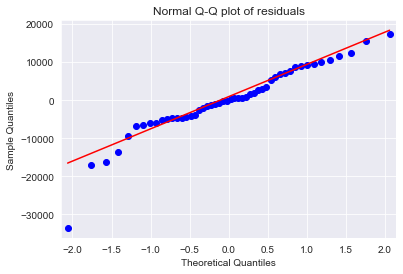

In [150]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [151]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

#### Residual Plot for Homoscedasticity

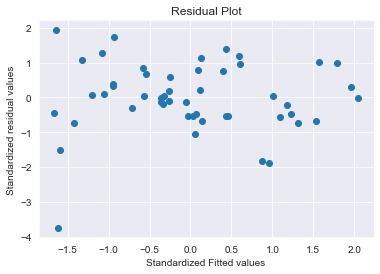

In [152]:

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### Residual Vs Regressors

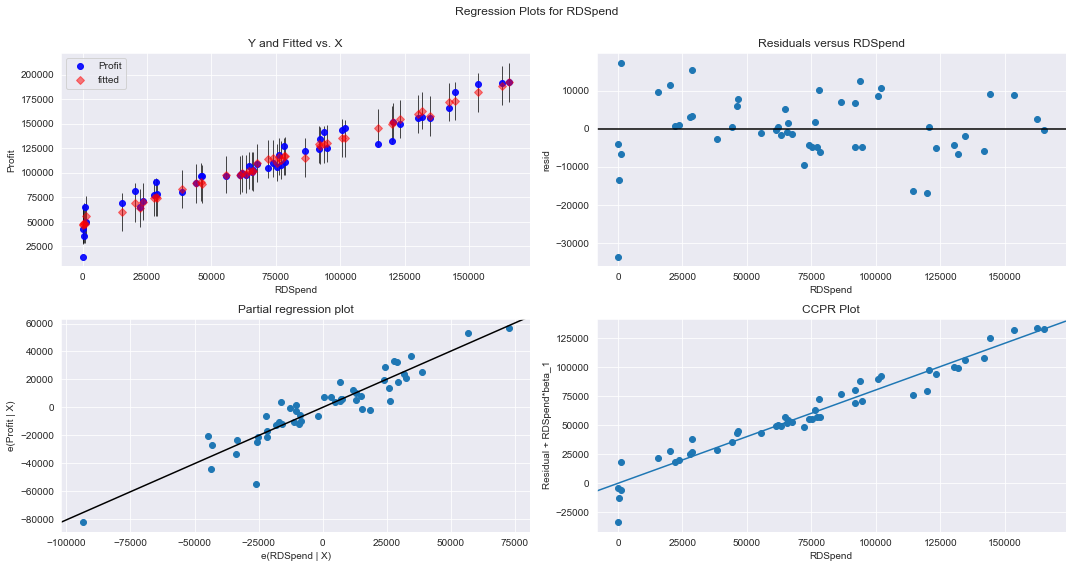

In [154]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

In [153]:
#Models based on Multilinear Regression
model = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=df).fit()
df["Prediction"]=model.fittedvalues
df["Error"]=model.resid
df.head()

,RDSpend,Administration,MarketingSpend,State,Profit,Prediction,Error
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


#### Partial regression plot

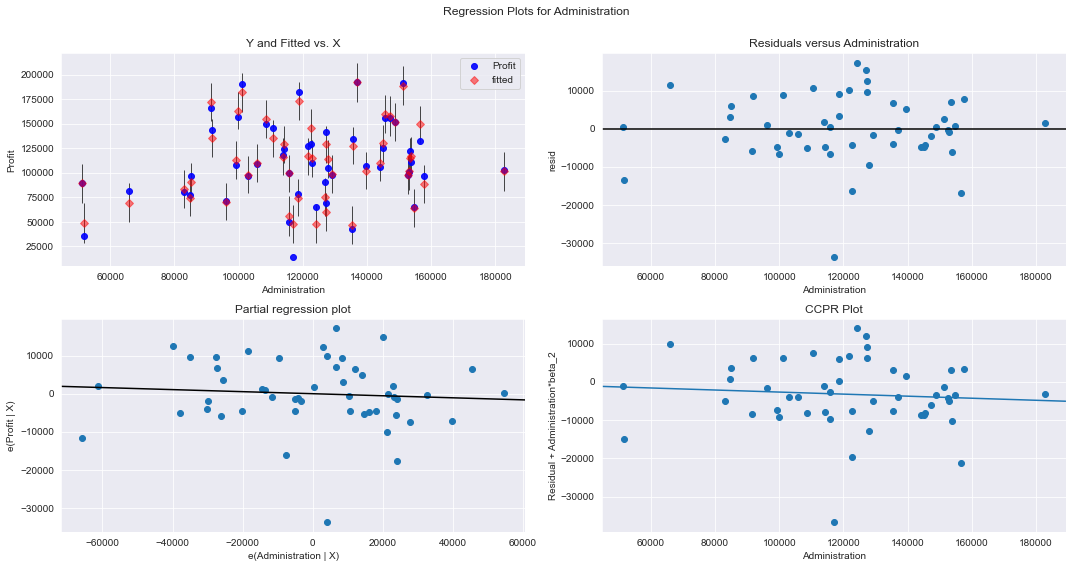

In [155]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

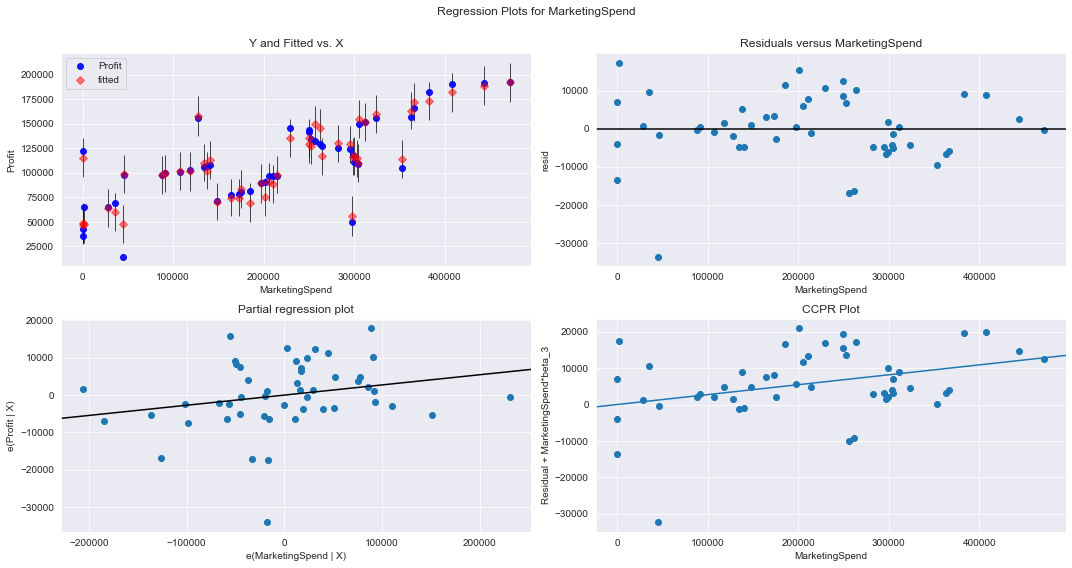

In [156]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

#### Model Deletion Diagnostics, Detecting Influencers/Outliers, Cook’s Distance

In [157]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

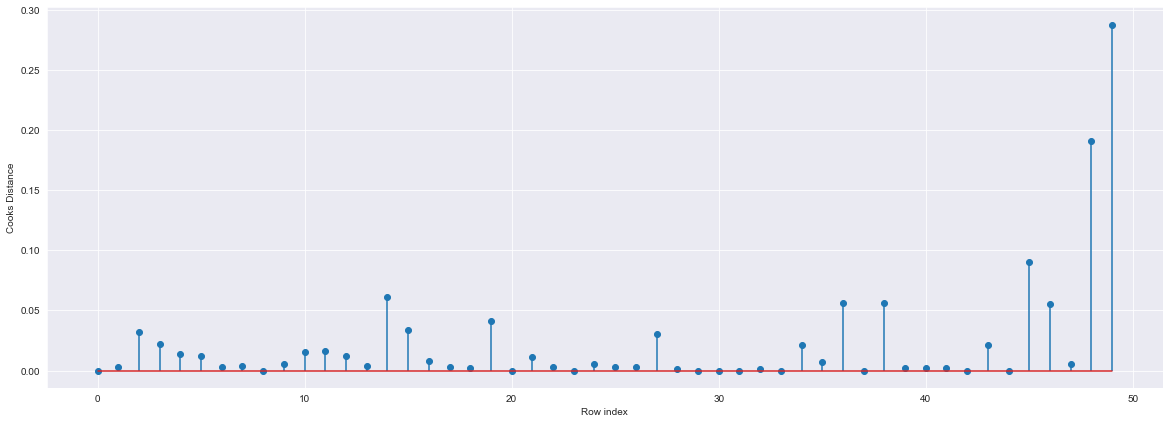

In [158]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#There is no value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

#### Prediction

In [159]:
#Final Model
model = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=df).fit()
df["Prediction"]=model.fittedvalues
df["Error"]=model.resid
df.head()

,RDSpend,Administration,MarketingSpend,State,Profit,Prediction,Error
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


In [144]:
RSquaredValues

,RDSpend,Administration,MarketingSpend,MultilinearReg
Type of RSquared,,,,
rsquared,0.946535,0.040287,0.559154,0.950746
rsquared_adj,0.945421,0.020293,0.549969,0.947534


# Toyota Corolla 

In [175]:
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 5 - Multilinear Regression\\ToyotaCorolla.csv",encoding='ANSI')
df=df.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [172]:
df=df.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [176]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [204]:
df.shape

(1436, 11)

In [180]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Prediction,Error
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010


In [181]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Prediction,Error
Price,1.000000,-8.765905e-01,-5.699602e-01,3.149898e-01,1.263892e-01,1.853255e-01,6.310386e-02,2.191969e-01,5.811976e-01,9.293884e-01,3.691033e-01
Age_08_04,-0.876590,1.000000e+00,5.056722e-01,-1.566220e-01,-9.808374e-02,-1.483592e-01,-5.363947e-03,-1.984305e-01,-4.702532e-01,-9.431907e-01,-3.388712e-13
KM,-0.569960,5.056722e-01,1.000000e+00,-3.335379e-01,1.026829e-01,-3.619661e-02,1.502333e-02,2.781647e-01,-2.859846e-02,-6.132637e-01,-1.158093e-13
HP,0.314990,-1.566220e-01,-3.335379e-01,1.000000e+00,3.585580e-02,9.242450e-02,2.094771e-01,-2.984317e-01,8.961406e-02,3.389216e-01,3.270423e-14
cc,0.126389,-9.808374e-02,1.026829e-01,3.585580e-02,1.000000e+00,7.990330e-02,1.462935e-02,3.069958e-01,3.356374e-01,1.359918e-01,5.303441e-14
Doors,0.185326,-1.483592e-01,-3.619661e-02,9.242450e-02,7.990330e-02,1.000000e+00,-1.601414e-01,1.093632e-01,3.026176e-01,1.994059e-01,5.205264e-14
Gears,0.063104,-5.363947e-03,1.502333e-02,2.094771e-01,1.462935e-02,-1.601414e-01,1.000000e+00,-5.451955e-03,2.061328e-02,6.789826e-02,4.973854e-15
Quarterly_Tax,0.219197,-1.984305e-01,2.781647e-01,-2.984317e-01,3.069958e-01,1.093632e-01,-5.451955e-03,1.000000e+00,6.261337e-01,2.358507e-01,9.784201e-14
Weight,0.581198,-4.702532e-01,-2.859846e-02,8.961406e-02,3.356374e-01,3.026176e-01,2.061328e-02,6.261337e-01,1.000000e+00,6.253549e-01,1.768506e-13
Prediction,0.929388,-9.431907e-01,-6.132637e-01,3.389216e-01,1.359918e-01,1.994059e-01,6.789826e-02,2.358507e-01,6.253549e-01,1.000000e+00,3.103173e-13


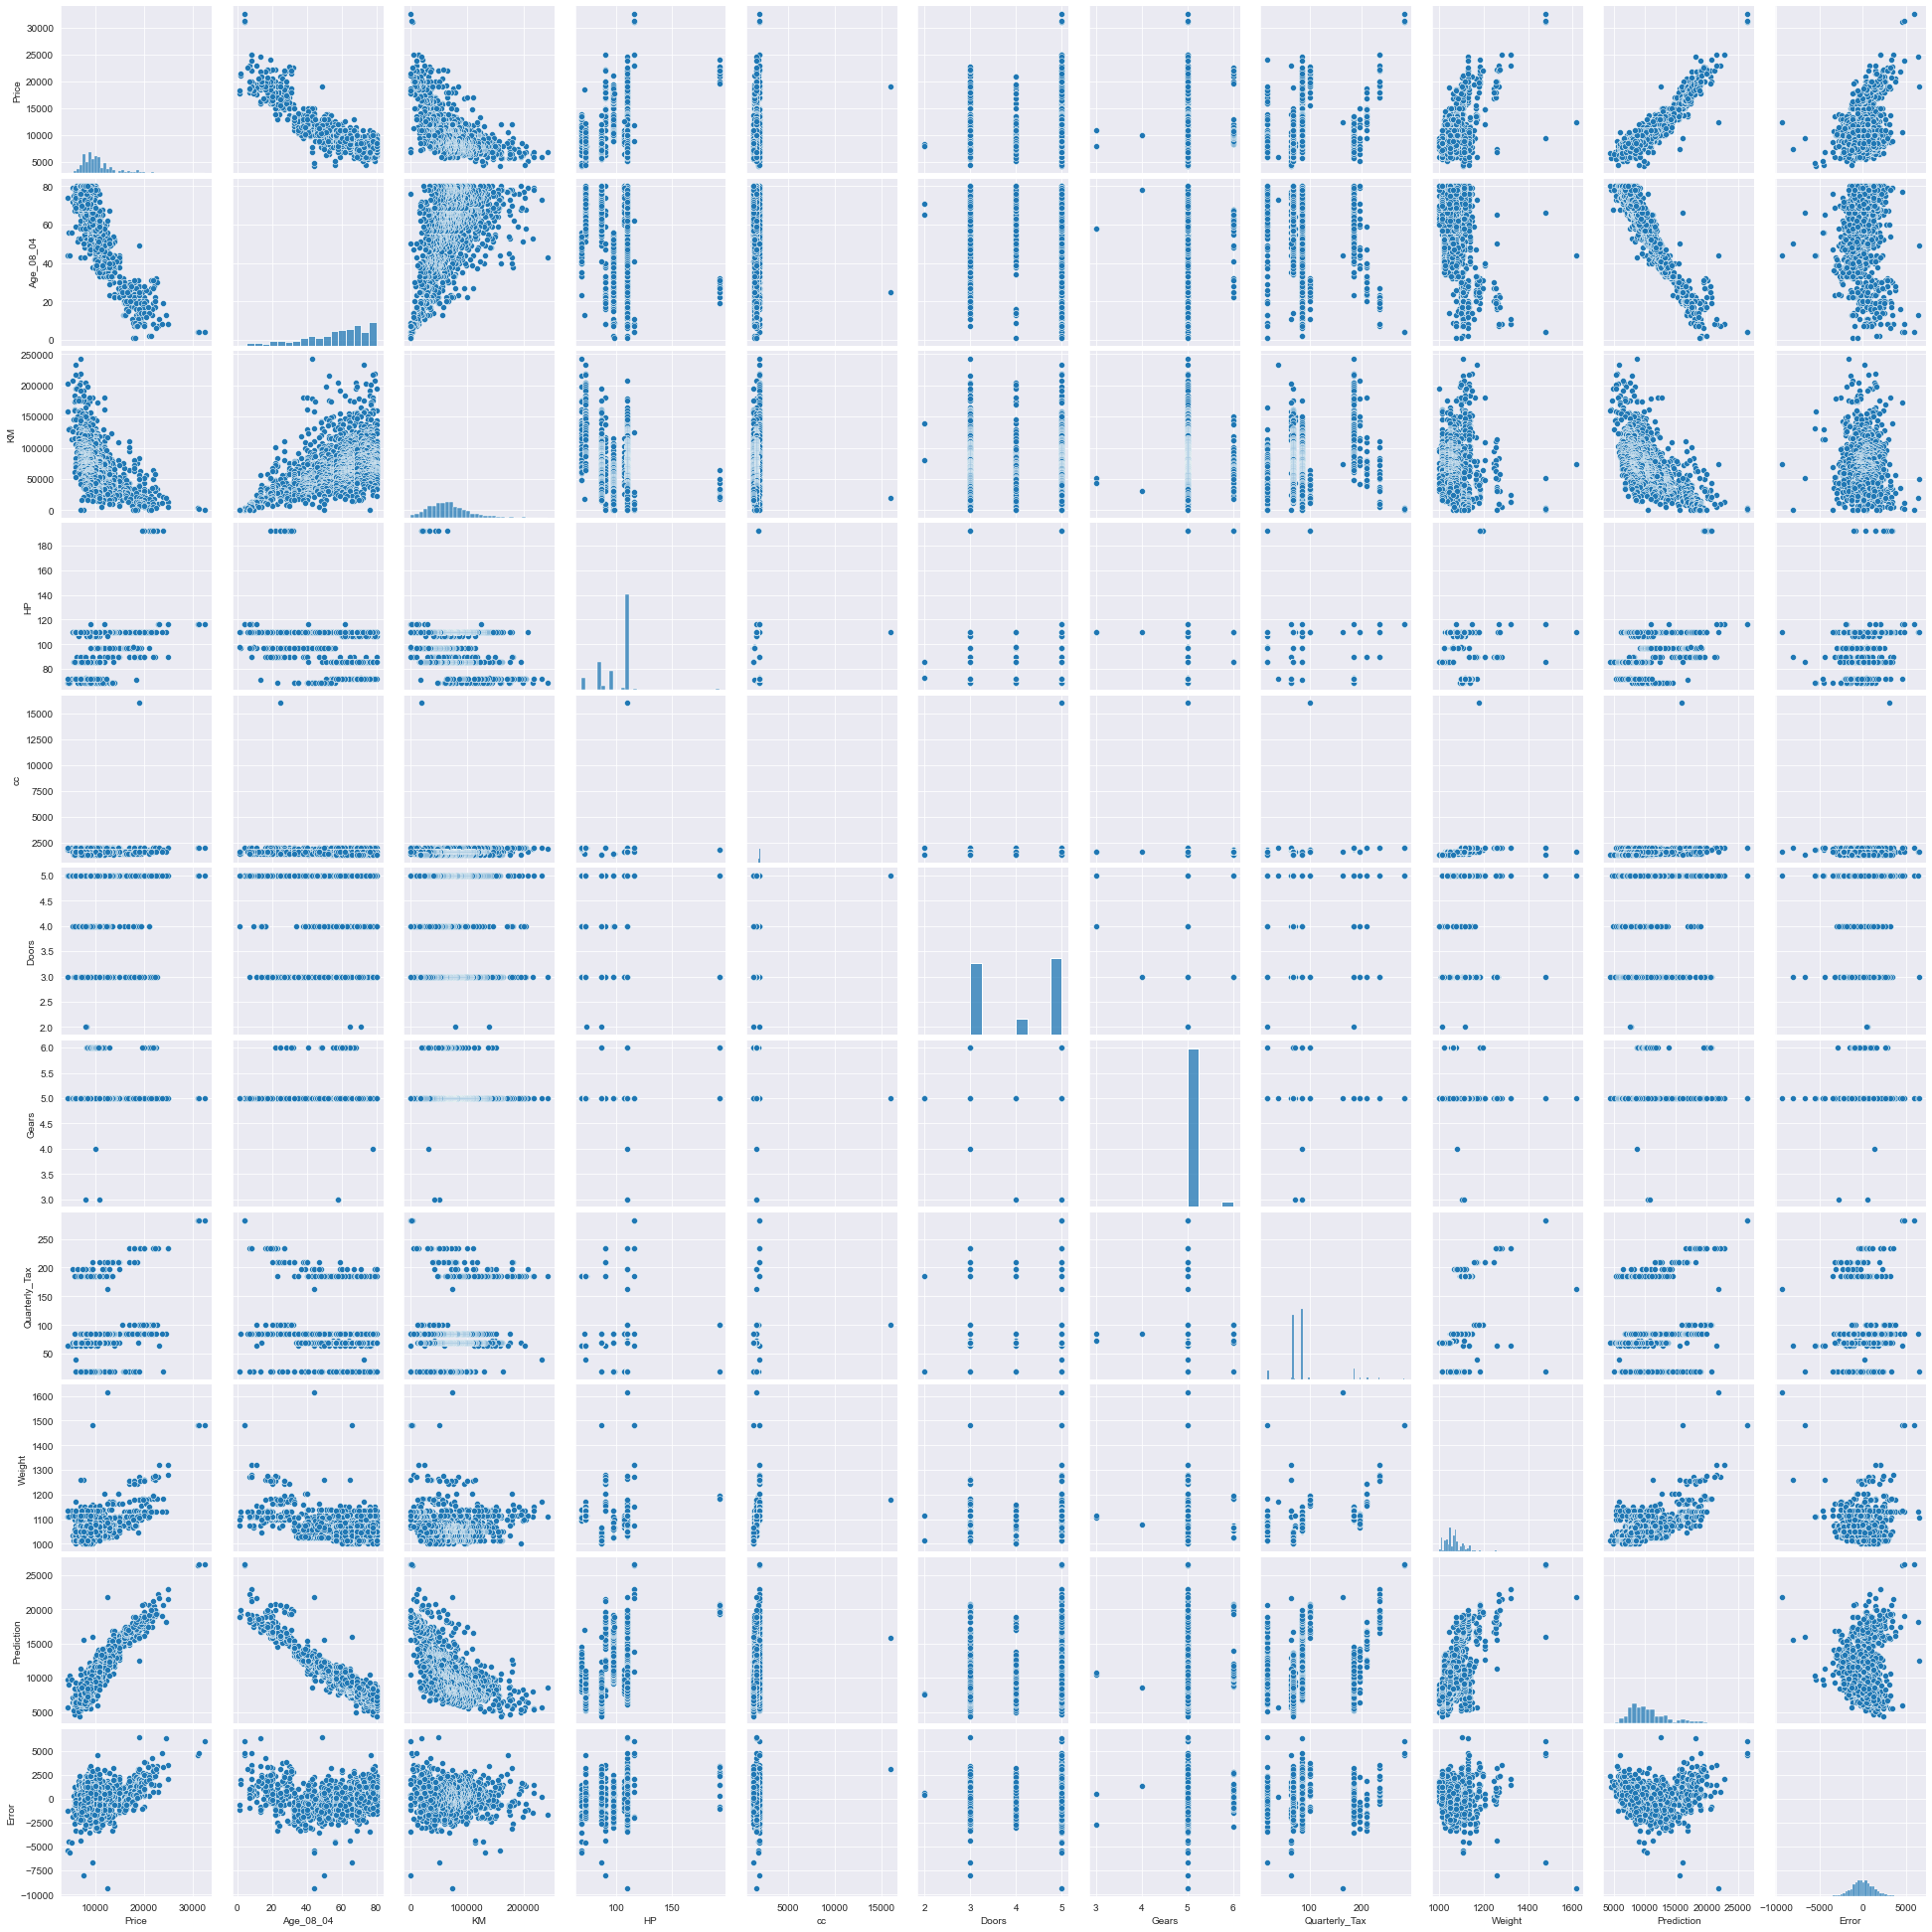

In [182]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

#### Model based on Multilinear Regression

In [185]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [186]:
df["Prediction"]=model.predict()
df["Error"]=model.resid
df.loc[:,["Price","Prediction","Error"]].head()

,Price,Prediction,Error
0,13500,16812.580505,-3312.580505
1,13750,16272.355186,-2522.355186
2,13950,16800.732460,-2850.732460
3,14950,16426.496731,-1476.496731
4,13750,16222.419010,-2472.419010


In [187]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [188]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [189]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

#### Residual Analysis: Test for Normality of Residuals (Q-Q Plot)

C:\Users\shred\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


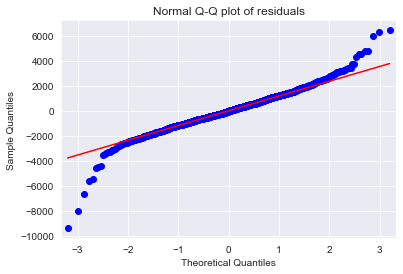

In [190]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [191]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

#### Residual Plot for Homoscedasticity

In [192]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

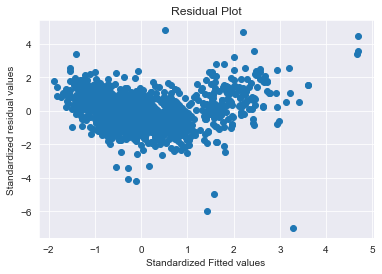

In [193]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### Residual Vs Regressors

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

#### Model Deletion Diagnostics, Detecting Influencers/Outliers, Cook’s Distance

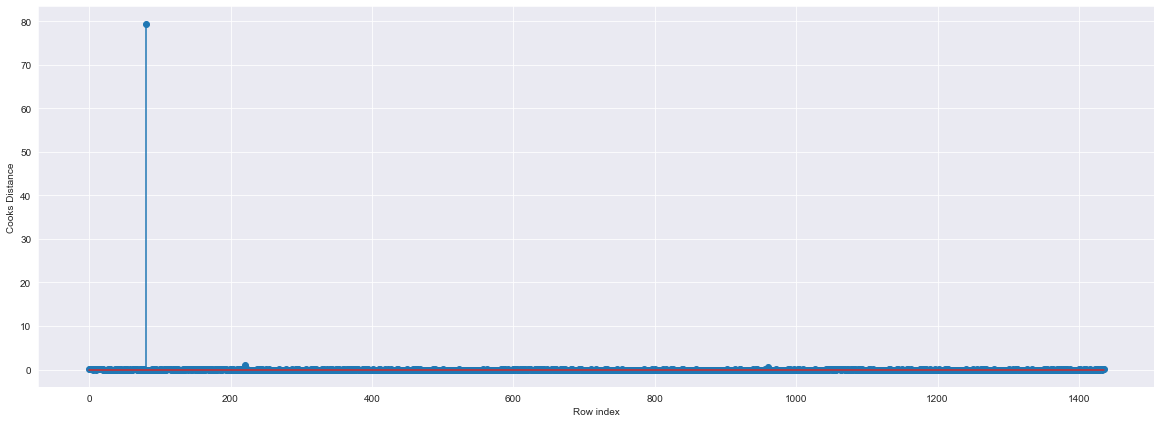

(80, 79.52010624138717)

In [195]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

#### High Influence points

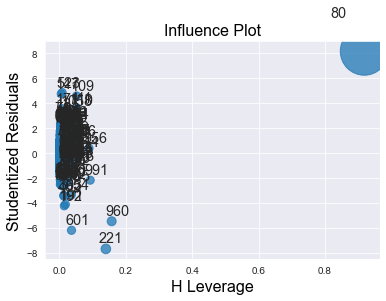

In [196]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [197]:
k = df.shape[1]-1
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

#### From the above plot, it is evident that data point 80 is the influencer

In [198]:
df[df.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Prediction,Error
80,18950,25,20019,110,16000,5,5,100,1180,15885.600444,3064.399556


#### Improving the model

In [199]:
#Load the data
df_new = df

In [200]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[80]],axis=0).reset_index()

In [201]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [205]:
df1.shape

(1435, 11)

#### Build Model

In [206]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()

In [207]:
(final_model.rsquared,final_model.aic)

(0.8693790488655818, 24687.28102432684)

In [208]:
(model.rsquared,model.aic)

(0.8637627463428192, 24769.07664007625)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [209]:
model_influence_V = final_model.get_influence()
(c_V, _) = model_influence_V.cooks_distance

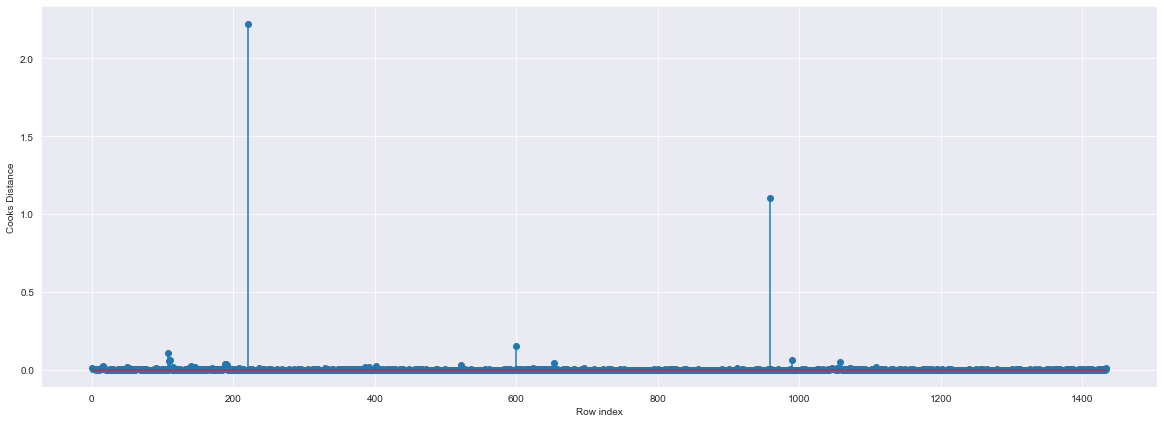

In [210]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [224]:
#index of the data points where c is more than .5
np.argwhere([c_V > .5])

array([[  0, 220],
       [  0, 959]], dtype=int64)

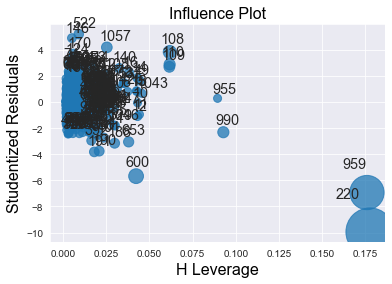

In [219]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_model)
plt.show()

In [225]:
#Drop 76 and 77 observations
df2=df1.drop(df1.index[[220,959]],axis=0)

In [226]:
#Reset the index and re arrange the row values
df2=df2.reset_index()

In [244]:
df2=df2.drop(['index','Prediction','Error'],axis=1)
df2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


# Cook’s Distance

In [245]:
df2.shape

(1433, 9)

In [246]:
final_model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df2).fit()

In [247]:
model_influence_VI = final_model1.get_influence()
(c_V, _) = model_influence_VI.cooks_distance

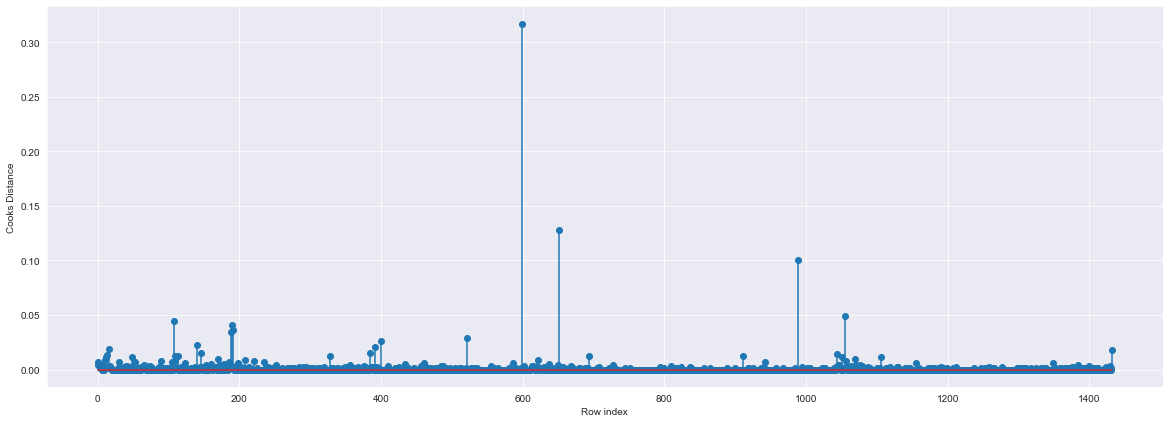

In [248]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [249]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(599, 0.31661315281441815)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [250]:
#First Model with all the data
(model.rsquared,model.aic)

(0.8637627463428192, 24769.07664007625)

In [251]:
#Final Model with corrected data
(final_model1.rsquared,final_model1.aic)

(0.8851845904421738, 24469.715205158594)

In [253]:
df2["Prediction"]=final_model1.predict()
df2["Error"]=final_model1.resid
df2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Prediction,Error
0,13500,23,46986,90,2000,3,5,210,1165,16333.273814,-2833.273814
1,13750,23,72937,90,2000,3,5,210,1165,15892.326850,-2142.326850
2,13950,24,41711,90,2000,3,5,210,1165,16310.886081,-2360.886081
3,14950,26,48000,90,2000,3,5,210,1165,15979.990390,-1029.990390
4,13750,30,38500,90,2000,3,5,210,1170,15846.536733,-2096.536733


In [256]:
sns.regplot(x=['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight'],y='Price',data=df2)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 8 and the array at index 1 has size 1433